# Logistic Regression Challenge

# Data Exploration

### Task 1.1 : Import required Python Libraries

In [1]:
#Importing all relevant Python Packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rc('font',size=14)

import seaborn as sb 
sb.set(style='white') #
sb.set(style='whitegrid',color_codes=True) #

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as me
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score,precision_score,f1_score,recall_score

import warnings
warnings.filterwarnings('ignore')

### Task 1.2 : Import data from data source

In [2]:
# Reading CSV train data file into DataFrame
df=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C5_S3_Income_Data_Challenge.csv')

# Previewing the data
df.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Task 1.3 : Check the structure of the data 

In [3]:
# exploring the existing data types
df.dtypes

Age                int64
WorkClass         object
Fnlwgt             int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Race              object
Gender            object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income_Bracket    object
dtype: object

In [4]:
# exploring the existing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   WorkClass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Gender          32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_Per_Week  32561 non-null  int64 
 13  Native_Country  32561 non-null  object
 14  Income_Bracket  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
 # exploring the strings
df_string=df.select_dtypes(exclude=[np.number])
df_string.head()

,WorkClass,Education,Marital_Status,Occupation,Relationship,Race,Gender,Native_Country,Income_Bracket
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [6]:
 # shape of the dataset
print('The number of samples in data is {}.'.format(df.shape[0]))

The number of samples in data is 32561.


### Task 1.4 : Summarize the data

In [7]:
# exploring the numeric data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education_Num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
Capital_Gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
Capital_Loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
Hours_Per_Week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


[]

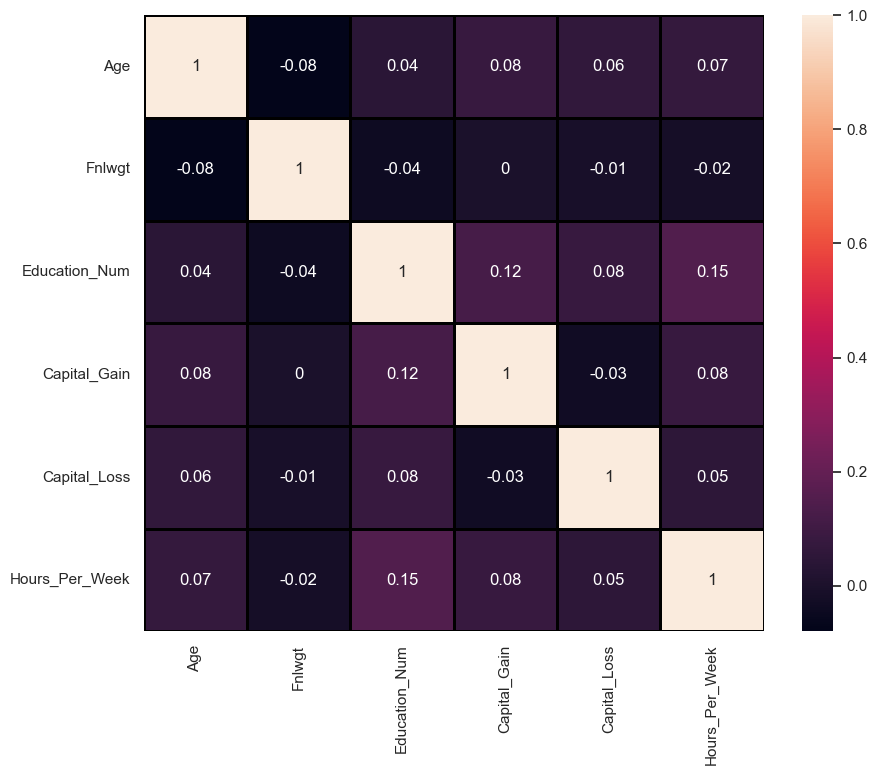

In [8]:
# Correlations
plt.figure(figsize=(10,8))
sb.heatmap(round(df.corr(),2),linecolor='black',linewidths=2,annot=True)
plt.plot()

# Data Preparation and Visualization

### Task 2.1 : Check if there any missing value exist in any feature, identify those features. 

In [9]:
df.isnull().sum()

Age               0
WorkClass         0
Fnlwgt            0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Gender            0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income_Bracket    0
dtype: int64

In [10]:
#no any missing value 

### Task 2.2 : Perfrom missing value treatment for categorical and numeric features if any require 

In [11]:
# no any missing value to perform missing value treatment

### Task 2.3 : Convert Non-numeric labeled columns into categorical types

In [12]:
#Separating categorical and numerical features
cat=[]
num=[]
for i in df.columns:
    if df[i].nunique()<20:
        cat.append(i)
    else:
        num.append(i)

In [13]:
#Categorical features
cat

['WorkClass',
 'Education',
 'Education_Num',
 'Marital_Status',
 'Occupation',
 'Relationship',
 'Race',
 'Gender',
 'Income_Bracket']

In [14]:
#Numerical Features
num

['Age',
 'Fnlwgt',
 'Capital_Gain',
 'Capital_Loss',
 'Hours_Per_Week',
 'Native_Country']

In [15]:
#Data type conversion of Education_Num
df['Education_Num'].astype('object')

0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name: Education_Num, Length: 32561, dtype: object

In [16]:
cat.append('Native_Country')

### Task 2.4 : Use Label Encoder technique to convert categorical columns into numeric columns

In [17]:
# Encoding categorical variables into numerical
for i in cat:
    df[i]=LabelEncoder().fit_transform(df[i])
df.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,39,7,77516,9,12,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,12,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,8,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,6,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,12,2,10,5,2,0,0,0,40,5,0


### Task 2.5 : Perform Data Scaling

In [18]:
#Performing feature scaling
sc=MinMaxScaler()
scale_df=pd.DataFrame(sc.fit_transform(df),columns=df.columns)
scale_df.head()

,Age,WorkClass,Fnlwgt,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income_Bracket
0,0.301370,0.875,0.044302,0.600000,0.800000,0.666667,0.071429,0.2,1.0,1.0,0.02174,0.0,0.397959,0.951220,0.0
1,0.452055,0.750,0.048238,0.600000,0.800000,0.333333,0.285714,0.0,1.0,1.0,0.00000,0.0,0.122449,0.951220,0.0
2,0.287671,0.500,0.138113,0.733333,0.533333,0.000000,0.428571,0.2,1.0,1.0,0.00000,0.0,0.397959,0.951220,0.0
3,0.493151,0.500,0.151068,0.066667,0.400000,0.333333,0.428571,0.0,0.5,1.0,0.00000,0.0,0.397959,0.951220,0.0
4,0.150685,0.500,0.221488,0.600000,0.800000,0.333333,0.714286,1.0,0.5,0.0,0.00000,0.0,0.397959,0.121951,0.0


### Task 2.6 : Select the best feature based on their correlation value 

[]

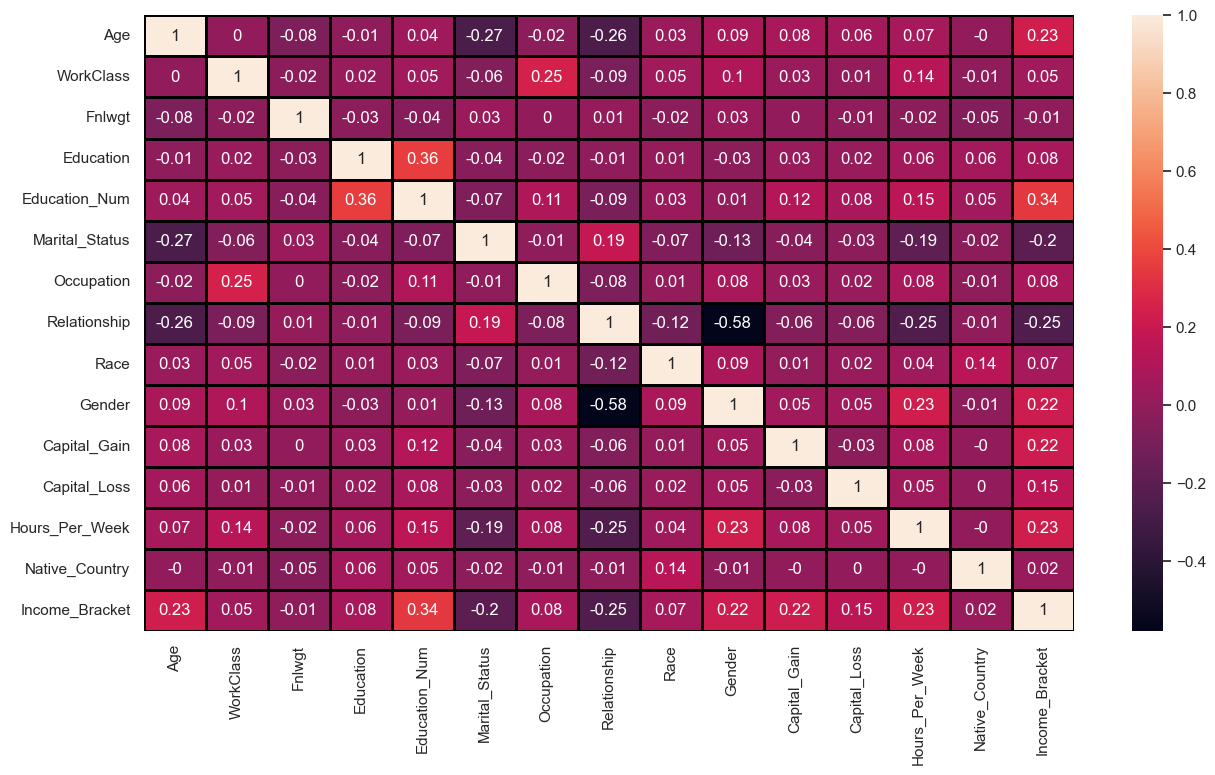

In [19]:
#Finding correlations
plt.figure(figsize=(15,8))
sb.heatmap(round(scale_df.corr(),2),linecolor='black',linewidths=2,annot=True)
plt.plot()

In [20]:
#Age, Eduction Num & Hours per week shows more relation with Income Bracket than other features

### Task 2.7 : Split data into train set and test set in 80:20 ratio by row indexing

In [21]:
scale_df.columns

Index(['Age', 'WorkClass', 'Fnlwgt', 'Education', 'Education_Num',
       'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital_Gain', 'Capital_Loss', 'Hours_Per_Week', 'Native_Country',
       'Income_Bracket'],
      dtype='object')

In [22]:
n=int(scale_df.shape[0]*0.8) #number of rows
X=scale_df.drop('Income_Bracket',axis=1)  #removing target column from input data
Y=scale_df['Income_Bracket']

In [23]:
X_train=X.iloc[:n]
Y_train=Y.iloc[:n]
print('Shape of test data : ',X_train.shape[0])

Shape of test data :  26048


In [24]:
X_test=X.iloc[n+1:]
Y_test=Y.iloc[n+1:]
print('Shape of test data : ',X_test.shape[0])

Shape of test data :  6512


### Task 2.8 : Perform all feasible data visualization to present the data 

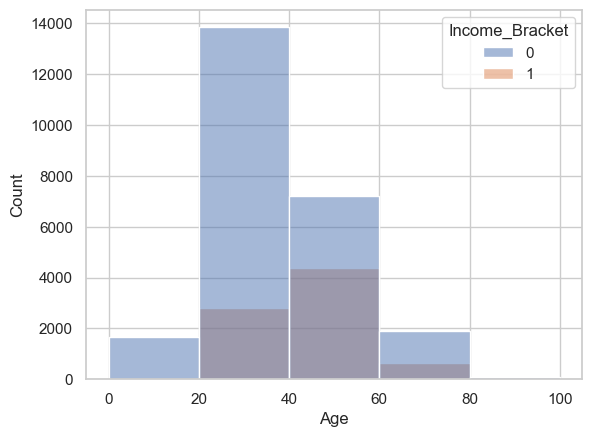

In [34]:
bins=[0,20,40,60,80,100]
sb.histplot(data=df,x='Age',hue='Income_Bracket',bins=bins);

# Train the Model

### Task 3.1 : Build the logistic regression model by fitting training dataset 

In [26]:
# Logistic Regression - training the model
model=LogisticRegression().fit(X_train,Y_train)

### Task 3.2 : Predict income of the test dataset using your model 

In [27]:
# Using the trained model to predict the outcome of the X_Test dataset
Y_pred=model.predict(X_test)
Y_pred

array([0., 0., 0., ..., 0., 0., 1.])

# Model Evaluation

### Task 4.1 : Build Confusion Matrix

In [28]:
print(confusion_matrix(Y_test,Y_pred))

tn,fp,fn,tp=confusion_matrix(Y_test,Y_pred).ravel()
print(tn, fp, fn, tp)

[[4650  262]
 [ 891  709]]
4650 262 891 709


### Task 4.2 : Evaluate different evaluation metrics values and interpret the model performance 

In [29]:
print('Accuracy : ',accuracy_score(Y_test,Y_pred))
print('Precision Score : ',precision_score(Y_test,Y_pred))
print('Recall : ',recall_score(Y_test,Y_pred))
print('F1score : ',f1_score(Y_test,Y_pred))

from sklearn.metrics import classification_report
print('Classification Report : ')
print(classification_report(Y_test,Y_pred))

Accuracy :  0.8229422604422605
Precision Score :  0.7301750772399588
Recall :  0.443125
F1score :  0.5515363671723065
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      4912
         1.0       0.73      0.44      0.55      1600

    accuracy                           0.82      6512
   macro avg       0.78      0.69      0.72      6512
weighted avg       0.81      0.82      0.81      6512



### Task 4.3 : Evaluate ROC and AUC curve

In [30]:
print('ROC : ',roc_auc_score(Y_test,Y_pred))


ROC :  0.6948931188925082


### Task 4.4 : Draw the ROC-AUC curve 

In [31]:
# predict probabilities
lr_prob=model.predict_proba(X_test)

In [32]:
# keeping probabilities for the positive outcome only
lr_prob=lr_prob[:,1]

Text(0, 0.5, 'TPR')

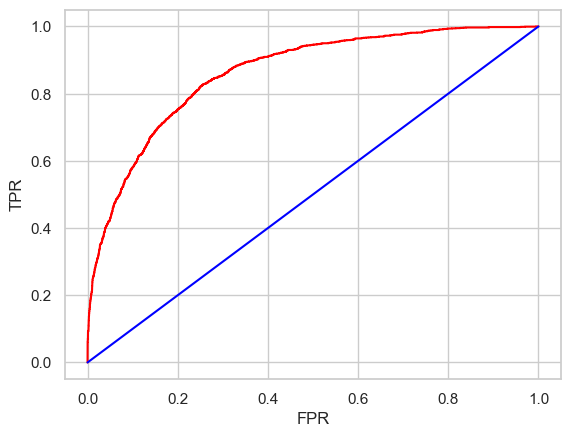

In [33]:
#ROC curve
fpr,tpr,threshold=roc_curve(Y_test,lr_prob)
plt.plot(fpr,tpr,color='red',label='roc')
plt.plot([0,1],[0,1],color='blue',linestyle='-')
plt.xlabel('FPR')
plt.ylabel('TPR')